
 Visualisierung der Aktivierungen mit TensorFlow 2.x


In [1]:
import tensorflow as tf
import numpy as np
import requests as requests
import matplotlib.pyplot as plt 

In [2]:
from PIL import Image
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Input, InputLayer, BatchNormalization, MaxPool2D, Conv2D,Flatten,Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# Laden der MNIST Daten
(train_data, train_labels), (eval_data, eval_labels) = mnist.load_data()
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
train_labels = to_categorical(train_labels, 10)
eval_labels = to_categorical(eval_labels,10)

In [4]:
# Modelaufbau 
def train_model():

    model = Sequential()
    model.add(Conv2D(32,(5,5),padding="same",name="Conv2D_1",input_shape=(28, 28,1),activation="relu"))
    model.add(MaxPool2D(padding='same',name="Max_Pooling_1",pool_size=(2,2),strides=2))

    model.add(Conv2D(64,(5,5),padding="same",name="Conv2D_2",activation="relu"))
    model.add(MaxPool2D(padding='same',name="Max_Pooling_2",pool_size=(2,2),strides=2))
    model.add(Flatten())

    model.add(Dense(1024,activation='relu',kernel_initializer='random_uniform',name="Dense_fc_1"))
    model.add(Dense(512,activation='relu',kernel_initializer='random_uniform',name="Dense_fc_2"))
    model.add(Dense(10, activation='softmax',name="Ausgabe"))

    model.compile(loss=keras.losses.categorical_crossentropy, 
    optimizer=keras.optimizers.Adadelta(), metrics = ["accuracy","mse",tf.keras.metrics.categorical_accuracy])

    model.fit(train_data,train_labels, batch_size=64, epochs=10)
    model.save('my_model.h5')

In [5]:
# Visualisierung der Layers
def visualize_layers_output(model,layer_names,input,first_image):
    
    feature_maps = []
    fig = plt.figure(1)

    # Eingabebild wird dargestellt
    # Ggfs. für ein anderes Modell, 
    # muss dieser Block verändert werden
    ax = fig.add_subplot(len(layer_names)+1,1,1)
    ax.imshow(first_image,cmap=plt.gray())
    ax.set_axis_off()

    for i, layer_name in enumerate(layer_names):
        try:
            model.get_layer(layer_name)
        except ValueError as err:
            print("{} : Modell besitzt keinen Layer mit diesem Namen ".format(err))

        output_of_layer = model.get_layer(layer_name).output

        m = Model(inputs=model.input,outputs=output_of_layer)

        # Feature Map wird generiert
        feature_map = m.predict(input)

        ax = fig.add_subplot(len(layer_names)+1,1,i+2)
        
        # Überprüfung
        if len(feature_map.shape) == 4: # Wenn 4 dann ist es ein Bild (1,28,28,3)
            feature_maps.append(np.hstack(np.transpose(feature_map[0], (2, 0, 1))))
        else: 
            if len(feature_map.shape) == 2: # Ein 1D-Array 
                feature_maps.append(np.expand_dims(feature_map[0],0))
            
        ax.imshow(feature_maps[i],cmap='jet')
        ax.set_title(layer_name)
        ax.set_axis_off()
        del m
    
    plt.show()

In [6]:
# Optional: Training des Modells 
train_model()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 5.1818 - accuracy: 0.5303 - mse: 0.0798 - categorical_accuracy: 0.5303
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.8065 - accuracy: 0.8385 - mse: 0.0262 - categorical_accuracy: 0.8385
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.5272 - accuracy: 0.8884 - mse: 0.0180 - categorical_accuracy: 0.8884
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.4091 - accuracy: 0.9107 - mse: 0.0144 - categorical_accuracy: 0.9107
Epoch 5/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.3394 - accuracy: 0.9236 - mse: 0.0122 - categorical_accuracy: 0.9236
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2920 - accuracy: 0.9328 - mse: 0.0107 - categorical_accuracy: 0.9328
Epoch 7/10
60000/60000 [==============================] - 73s 1ms

In [7]:
# oder direkte benutzung eines existierenden Modells
model = tf.keras.models.load_model("my_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
Max_Pooling_1 (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
Max_Pooling_2 (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Dense_fc_1 (Dense)           (None, 1024)              3212288   
_________________________________________________________________
Dense_fc_2 (Dense)           (None, 512)               5

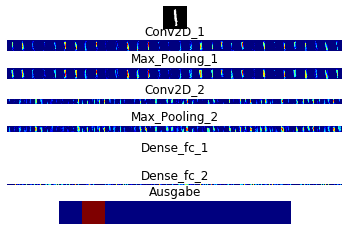

In [8]:
# Auswahl der Schichten des Modells für die Visualisierung
layers = ["Conv2D_1","Max_Pooling_1","Conv2D_2","Max_Pooling_2","Dense_fc_1","Dense_fc_2","Ausgabe"]
input = train_data[8:9]
img = train_data[8:9]
visualize_layers_output(model,layers,input,first_image=img.reshape(28,28))

In [9]:
# Optionales Beispiel mit VGG16
'''
vgg = keras.applications.VGG16()
vgg.summary()
img_path = "./samples/cat.jpg"
img = np.array(Image.open(img_path).convert('RGB').resize((224, 224)))
input = np.expand_dims(img,axis=0) 
visualize_layers_output(vgg,["block1_conv2","block3_conv2"],input,first_image=img)
'''

'\nvgg = keras.applications.VGG16()\nvgg.summary()\nimg_path = "./samples/cat.jpg"\nimg = np.array(Image.open(img_path).convert(\'RGB\').resize((224, 224)))\ninput = np.expand_dims(img,axis=0) \nvisualize_layers_output(vgg,["block1_conv2","block3_conv2"],input,first_image=img)\n'